In [63]:
# 必要ライブラリのインストール
from PIL import Image
import numpy as np

In [64]:
def MSE(x, y):
    l = len(x)
    sum = 0.0
    for i in range(l):
        diff = float(x[i]) - float(y[i])
        sum += (diff * diff)
    return sum / l

In [65]:
img1 = Image.open('ref/c1b_ref.tga')
img2 = Image.open('c1b_approx2/c1b_16_16_0.5_16_2.tga')
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')
img1_gray_arr = np.array(img1_gray)
img2_gray_arr = np.array(img2_gray)

In [88]:
def phi(k, N):
	if k == 0:
		return np.ones(N) / np.sqrt(N)
	else:
		return np.sqrt(2.0 / N) * np.cos((k * np.pi / (2 * N)) * (np.arange(N) * 2 + 1))

def DCT_mat_element_product(N):
	phi_1d = np.array([phi(k, N) for k in range(N)])
	phi_2d = np.zeros((N,N,N,N))
	
	for i in range(N):
		for j in range(N):
			phi_i, phi_j = np.meshgrid(phi_1d[i], phi_1d[j])
			phi_2d[i, j] = phi_i*phi_j
			
	return phi_2d.reshape(N * N, N * N)

In [93]:
A = DCT_mat_element_product(8)
f = open('tmp.txt', 'w')
for i in range(64):
    for j in range(64):
        f.write(str(A[i, j]) + ' ')
    f.write('\n')
f.close()

In [66]:
def DCT_mat_2step(n):
    C = np.array([[0.0] * n] * n)
    for i in range(n):
        for j in range(n):
            if i == 0:
                C[i, j] = np.sqrt(1.0 / n) * np.cos(i * (2 * j + 1) * np.pi / (2.0 * n))
            else:
                C[i, j] = np.sqrt(2.0 / n) * np.cos(i * (2 * j + 1) * np.pi / (2.0 * n))
    return C

In [ ]:
def DCT_mat_element_prob(n):
    C = np.array([0.0] * (n * n))
    for i in range(n):
        for j in range(n):
            C[i * n + j] = np.cos((2 * ))

In [62]:
DCT_mat(8)

array([[ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
         0.35355339,  0.35355339,  0.35355339],
       [ 0.49039264,  0.41573481,  0.27778512,  0.09754516, -0.09754516,
        -0.27778512, -0.41573481, -0.49039264],
       [ 0.46193977,  0.19134172, -0.19134172, -0.46193977, -0.46193977,
        -0.19134172,  0.19134172,  0.46193977],
       [ 0.41573481, -0.09754516, -0.49039264, -0.27778512,  0.27778512,
         0.49039264,  0.09754516, -0.41573481],
       [ 0.35355339, -0.35355339, -0.35355339,  0.35355339,  0.35355339,
        -0.35355339, -0.35355339,  0.35355339],
       [ 0.27778512, -0.49039264,  0.09754516,  0.41573481, -0.41573481,
        -0.09754516,  0.49039264, -0.27778512],
       [ 0.19134172, -0.46193977,  0.46193977, -0.19134172, -0.19134172,
         0.46193977, -0.46193977,  0.19134172],
       [ 0.09754516, -0.27778512,  0.41573481, -0.49039264,  0.49039264,
        -0.41573481,  0.27778512, -0.09754516]])

In [74]:
i0 = 480
j0 = 40
block1 = img1_gray_arr[i0 : i0 + N, j0 : j0 + N]
mat1 = DCT_block(block1)
for i in range(N):
    for j in range(N):
        print(mat1[i, j], end = ' ')
    print('')

1484.6249999999998 -3.8373934689263827 -5.317115014768486 1.0896771304564226 -0.12499999999994316 0.41674247101026296 -0.09766227380694126 0.7751392319173744 
2.2802056865210716 4.752692423584159 1.4023525324033894 -0.8555868384495025 -1.3769845310281017 -2.3986577241511675 -1.41597098170674 -0.3065665208812567 
-11.929186173040819 12.011978492480171 0.5669417382416047 -2.74375034043395 -3.2219715424172293 0.7004516690971805 0.6919417382416011 0.18416647444496936 
-4.111339290603723 4.131972102083495 -1.0606088515121392 -3.1738595722080447 0.8497732506178677 0.08720345912570959 -0.37233932628378863 -0.5601033092052177 
9.875000000000085 -4.7896084331423765 3.548612283636313 2.395355598865393 -0.8749999999999893 0.262608997273329 -0.25219211015698484 0.43641623103028593 
-0.2945677890160425 1.383326613908622 -0.5122524381717586 -1.1627965408742726 0.1167916679368064 -0.06878111491124805 0.2928216437679474 -0.2519113743996835 
-1.6884215258441202 1.0474358827801886 0.19194173824159577 0.

In [76]:
A = mat1.dot(np.linalg.inv(block1))
print(A)

[[ 6.23340103e+03 -6.71500033e+03  7.37856511e+03 -1.06265734e+04
   1.06122139e+04 -8.78463116e+03 -3.56925557e+03  5.50455899e+03]
 [-3.30890439e+01  3.63381566e+01 -3.75990624e+01  5.36015949e+01
  -5.49004029e+01  4.44154269e+01  1.88195575e+01 -2.77388617e+01]
 [-1.78465881e+02  1.94881109e+02 -2.09756266e+02  3.01874431e+02
  -3.05275278e+02  2.46813685e+02  1.02415869e+02 -1.53352484e+02]
 [-7.98715462e+01  8.75484106e+01 -9.48114762e+01  1.36345767e+02
  -1.36487571e+02  1.07610541e+02  4.89871261e+01 -6.97105671e+01]
 [ 1.27810710e+02 -1.38642264e+02  1.49205649e+02 -2.16082264e+02
   2.18453075e+02 -1.73339713e+02 -7.58990715e+01  1.09113666e+02]
 [-2.20094729e+01  2.39195874e+01 -2.55410635e+01  3.70474104e+01
  -3.73063595e+01  2.91634319e+01  1.34530852e+01 -1.88316461e+01]
 [-1.89544027e+01  2.05064447e+01 -2.18979290e+01  3.15027023e+01
  -3.17511973e+01  2.55516191e+01  1.11046522e+01 -1.61549676e+01]
 [-1.56063697e+01  1.74918340e+01 -1.91884513e+01  2.74147216e+01
  -

In [ ]:
A.dot()

In [27]:
def DCT_block(img_block):
    #N = 8			# データの次元は10x10とする
    dct = DCT(N)	# 離散コサイン変換を行うクラスを作成
    c = dct.dct2(img_block)	# 2次元離散コサイン変換
    return c

In [53]:
def DCT(block):
    n = block.shape[0]
    C = DCT_mat(n)
    return C.dot(block).dot(C.T)

def IDCT(block):
    n = block.shape[0]
    C = DCT_mat(n)
    return (C.T).dot(block).dot(C)

def coef_delete_round(block):
    res = block
    for i in range(0, 8):
        for j in range(0, 8):
            cond = (i == 0) or (j == 0) or (i + j <= 4)
            if cond:
                res[i, j] = round(block[i, j])
            else:
                res[i, j] = 0
    return res


In [47]:
block1x = IDCT(coef_delete(DCT(block1)))

In [52]:
DCT(block1)

array([[ 1.48462500e+03,  2.28020569e+00, -1.19291862e+01,
        -4.11133929e+00,  9.87500000e+00, -2.94567789e-01,
        -1.68842153e+00, -3.51114059e-01],
       [-3.83739347e+00,  4.75269242e+00,  1.20119785e+01,
         4.13197210e+00, -4.78960843e+00,  1.38332661e+00,
         1.04743588e+00,  9.43433479e-01],
       [-5.31711501e+00,  1.40235253e+00,  5.66941738e-01,
        -1.06060885e+00,  3.54861228e+00, -5.12252438e-01,
         1.91941738e-01, -4.96514135e-01],
       [ 1.08967713e+00, -8.55586838e-01, -2.74375034e+00,
        -3.17385957e+00,  2.39535560e+00, -1.16279654e+00,
         8.62911223e-02, -2.17458799e-01],
       [-1.25000000e-01, -1.37698453e+00, -3.22197154e+00,
         8.49773251e-01, -8.75000000e-01,  1.16791668e-01,
         3.87491135e-01, -6.56245937e-01],
       [ 4.16742471e-01, -2.39865772e+00,  7.00451669e-01,
         8.72034591e-02,  2.62608997e-01, -6.87811149e-02,
        -3.29407420e-01,  3.21189857e-01],
       [-9.76622738e-02, -1.415970

In [56]:
block1x = IDCT(coef_delete_round(DCT(block1)))

In [57]:
block1x

array([[188.18237591, 185.0547282 , 182.93908216, 184.87033432,
        184.54911145, 181.6951665 , 182.49642354, 184.58357871],
       [187.72509181, 185.07612691, 183.54221185, 185.74916387,
        185.28751053, 182.07796448, 182.56815813, 184.50269517],
       [187.19884582, 185.43534486, 184.99189035, 187.75551445,
        187.11987849, 183.36400374, 183.38477926, 185.10177945],
       [185.58415125, 184.95255551, 185.91455806, 189.43292011,
        188.66682442, 184.34869907, 183.91242861, 185.44434546],
       [184.24656941, 184.76331298, 187.1389765 , 191.4008719 ,
        190.49991825, 185.65834081, 184.84394328, 186.257214  ],
       [182.19056485, 183.6523625 , 187.15171846, 191.92436004,
        190.78736454, 185.43243795, 184.29344338, 185.62767285],
       [181.04021227, 183.12322645, 187.31456762, 192.29882482,
        190.83853103, 185.00643282, 183.58533123, 184.85199   ],
       [180.14161818, 182.51646403, 187.00777157, 192.02373685,
        190.31743047, 184.1786326

In [60]:
IDCT(img3_gray_arr[i0 : i0 + N, j0 : j0 + N])

array([[ 1.29790643e+03, -3.51904442e+02,  2.71101024e+02,
        -1.04360713e+02,  1.61256837e+02, -1.55204138e+01,
         8.96070431e+01,  3.89072586e+01],
       [-3.61787189e+02,  1.07442796e+02, -6.45019948e+01,
         2.87644065e+01, -4.20646675e+01,  4.37493571e+00,
        -2.30570011e+01, -9.41334214e+00],
       [ 2.76166291e+02, -7.79858642e+01,  5.40908887e+01,
        -2.25060714e+01,  3.37051936e+01, -3.42833842e+00,
         1.87733507e+01,  8.16447741e+00],
       [-9.91360774e+01,  2.91877198e+01, -1.75585755e+01,
         7.45575050e+00, -1.20842514e+01,  1.52718273e+00,
        -6.51474924e+00, -2.97447826e+00],
       [ 1.50939781e+02, -4.16773351e+01,  3.02259942e+01,
        -1.17297533e+01,  1.87134521e+01, -2.04040414e+00,
         1.04967614e+01,  4.60144571e+00],
       [-1.55971433e+01,  5.57800037e+00, -1.76024390e+00,
         1.46147970e+00, -8.31811181e-01,  8.84042712e-02,
        -1.26958626e+00, -8.05747583e-02],
       [ 8.73255575e+01, -2.337900

In [6]:
img_gray_arr = img2_gray_arr
height = img_gray_arr.shape[0]
width = img_gray_arr.shape[1]

sum = np.array(np.zeros((N, N)))
for i in range(0, height, N):
    for j in range(0, width, N):
        sum += abs(DCT_block(img_gray_arr[i : i + N, j : j + N]))
ave = sum / (height / N * width / N)

f = open('tmp.txt', 'w')
for i in range(N):
    for j in range(N):
        f.write(str(ave[i, j]) + ' ')
    f.write('\n')
f.close()

KeyboardInterrupt: 

In [17]:
i0 = 480
j0 = 40
mat1 = DCT_block(img1_gray_arr[i0 : i0 + N, j0 : j0 + N])
for i in range(N):
    for j in range(N):
        print(mat1[i, j], end = ' ')
    print('')

1484.6249999999998 -3.8373934689263827 -5.317115014768486 1.0896771304564226 -0.12499999999994316 0.41674247101026296 -0.09766227380694126 0.7751392319173744 
2.2802056865210716 4.752692423584159 1.4023525324033894 -0.8555868384495025 -1.3769845310281017 -2.3986577241511675 -1.41597098170674 -0.3065665208812567 
-11.929186173040819 12.011978492480171 0.5669417382416047 -2.74375034043395 -3.2219715424172293 0.7004516690971805 0.6919417382416011 0.18416647444496936 
-4.111339290603723 4.131972102083495 -1.0606088515121392 -3.1738595722080447 0.8497732506178677 0.08720345912570959 -0.37233932628378863 -0.5601033092052177 
9.875000000000085 -4.7896084331423765 3.548612283636313 2.395355598865393 -0.8749999999999893 0.262608997273329 -0.25219211015698484 0.43641623103028593 
-0.2945677890160425 1.383326613908622 -0.5122524381717586 -1.1627965408742726 0.1167916679368064 -0.06878111491124805 0.2928216437679474 -0.2519113743996835 
-1.6884215258441202 1.0474358827801886 0.19194173824159577 0.

In [19]:
img3 = Image.open('ref_jpg/c1b_ref.jpg')
img3_gray = img3.convert('L')
img3_gray_arr = np.array(img3_gray)
mat3 = DCT_block(img3_gray_arr[i0 : i0 + N, j0 : j0 + N])
for i in range(N):
    for j in range(N):
        print(mat3[i, j], end = ' ')
    print('')

1487.6249999999998 -6.321734102765493 -6.989946887809264 0.4574955057808978 0.12500000000005684 -0.2440689273924903 -0.21654677464276695 -0.28161348476689874 
0.04970024577141885 6.188886551744357 -0.362072648411786 -0.3057179615476304 0.2858770085573239 0.063708246267276 0.0531518809229401 -0.5732994970271428 
-10.37523880083603 14.255196218044318 -0.5151650429449504 0.05934514696909865 -0.06764951251827611 0.15471552215267437 0.14016504294497345 -0.007139484342935987 
-8.056255549812676 -0.3496121243422401 -0.2265318615882297 -0.35901315290751246 0.21070889769044054 0.07099075671021549 -0.5095673755307528 -0.2380684490293561 
12.375000000000085 0.1448096644779575 0.4899611118286522 -0.32722440580416645 0.375 0.8079155765544925 0.2029485375548159 0.1781201012814524 
-0.06340428253562891 -0.46903833215717405 0.04505998887540308 0.3513208426001295 -0.22215256116933446 -0.249744057728563 0.29644957502237146 0.25394126625099767 
0.10329484803250466 0.2753044420922457 0.39016504294494503 -

In [23]:
DCT_block(img1_gray_arr[i0 : i0 + N, j0 : j0 + N])

array([[ 1.48462500e+03, -3.83739347e+00, -5.31711501e+00,
         1.08967713e+00, -1.25000000e-01,  4.16742471e-01,
        -9.76622738e-02,  7.75139232e-01],
       [ 2.28020569e+00,  4.75269242e+00,  1.40235253e+00,
        -8.55586838e-01, -1.37698453e+00, -2.39865772e+00,
        -1.41597098e+00, -3.06566521e-01],
       [-1.19291862e+01,  1.20119785e+01,  5.66941738e-01,
        -2.74375034e+00, -3.22197154e+00,  7.00451669e-01,
         6.91941738e-01,  1.84166474e-01],
       [-4.11133929e+00,  4.13197210e+00, -1.06060885e+00,
        -3.17385957e+00,  8.49773251e-01,  8.72034591e-02,
        -3.72339326e-01, -5.60103309e-01],
       [ 9.87500000e+00, -4.78960843e+00,  3.54861228e+00,
         2.39535560e+00, -8.75000000e-01,  2.62608997e-01,
        -2.52192110e-01,  4.36416231e-01],
       [-2.94567789e-01,  1.38332661e+00, -5.12252438e-01,
        -1.16279654e+00,  1.16791668e-01, -6.87811149e-02,
         2.92821644e-01, -2.51911374e-01],
       [-1.68842153e+00,  1.047435

In [21]:
img3_gray_arr[i0 : i0 + N, j0 : j0 + N]

array([[187, 184, 184, 185, 183, 179, 181, 187],
       [187, 185, 185, 186, 184, 181, 182, 187],
       [187, 185, 186, 188, 186, 182, 183, 188],
       [187, 186, 187, 190, 189, 184, 184, 188],
       [185, 185, 188, 192, 190, 186, 185, 188],
       [183, 184, 188, 193, 191, 186, 185, 187],
       [181, 182, 187, 193, 192, 186, 184, 186],
       [180, 181, 187, 193, 192, 186, 183, 185]], dtype=uint8)

In [18]:
mat2 = DCT_block(img2_gray_arr[i0 : i0 + N, j0 : j0 + N])
for i in range(N):
    for j in range(N):
        print(mat2[i, j], end = ' ')
    print('')

1469.9999999999998 -6.92506925143055 -3.7979881066803998 3.0776659750411817 -2.9999999999999467 0.44363538941512815 4.549756734322504 0.49957546999744107 
-2.811480514116056 3.4389037903992783 -2.435815059103012 -2.0968852234482727 2.948824205144442 0.14735620546862727 -2.168206046671051 4.197588166745579 
6.859455565600626 12.835253324881329 -0.6945436482630072 3.5112911171249745 0.02321364274455462 -0.10623594146721871 -1.176776695296641 -3.488966434851326 
9.950684033620405 0.24877852263321465 1.268859828200494 3.0225085901161908 2.454887719347716 -1.0873290885871763 -1.834834943586162 -2.7564455506999423 
2.0000000000000853 -1.35548555325526 -5.7906616023962485 3.270954645489674 -0.5 1.195499769540831 1.0455803204601573 -1.4694539540569647 
5.212169073742729 -0.6148747928597231 -0.5213589704323383 0.9984573490397182 1.9988217928119854 0.623938019290553 -4.166571432336189 3.1200988661928406 
2.8412795257672485 -2.347281905340367 0.8232233047033368 0.8638743244847529 -1.9038017561685

In [7]:
from PIL import ImageFilter

In [12]:
tmp_arr = np.array(img1_gray.filter(ImageFilter.FIND_EDGES))
tmp_arr[266 : 276, 467 : 477]

array([[  5,   2,   2,   0,   4,   0,   5,   6,   0,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   5,   0,   0,   0,   0,   0,   0, 109, 255],
       [  1,   0,   0,   0,   0,  44, 255, 255, 255, 255],
       [  0,   0,   0, 130, 255, 255, 255, 242,   0,   0],
       [  0, 194, 255, 255, 255,   0,   0,   0,   0,   0],
       [255, 255, 240,   0,   0,   0,   0,   0,  28,  49],
       [166,   0,   0,   0,   0,   0,  18,  43,  23,   8],
       [  0,   0,   0,   0,   0,  40,  28,  18,   6,  11],
       [  0,   0,   0,  32,  31,  25,   9,   6,   4,   6]], dtype=uint8)

In [13]:
img1_gray_arr[266 : 276, 467 : 477]

array([[170, 168, 166, 164, 163, 161, 162, 162, 161, 160],
       [166, 165, 162, 161, 160, 159, 159, 160, 159, 171],
       [163, 162, 160, 159, 158, 157, 164, 193, 226, 251],
       [160, 158, 157, 158, 176, 214, 248, 255, 255, 255],
       [157, 157, 184, 228, 255, 255, 255, 235, 172, 150],
       [187, 236, 255, 255, 254, 203, 168, 150, 135, 140],
       [255, 255, 244, 186, 172, 154, 135, 144, 158, 164],
       [237, 185, 177, 163, 139, 142, 158, 165, 168, 170],
       [183, 172, 149, 141, 156, 165, 169, 172, 173, 175],
       [165, 140, 150, 164, 169, 173, 174, 175, 176, 177]], dtype=uint8)

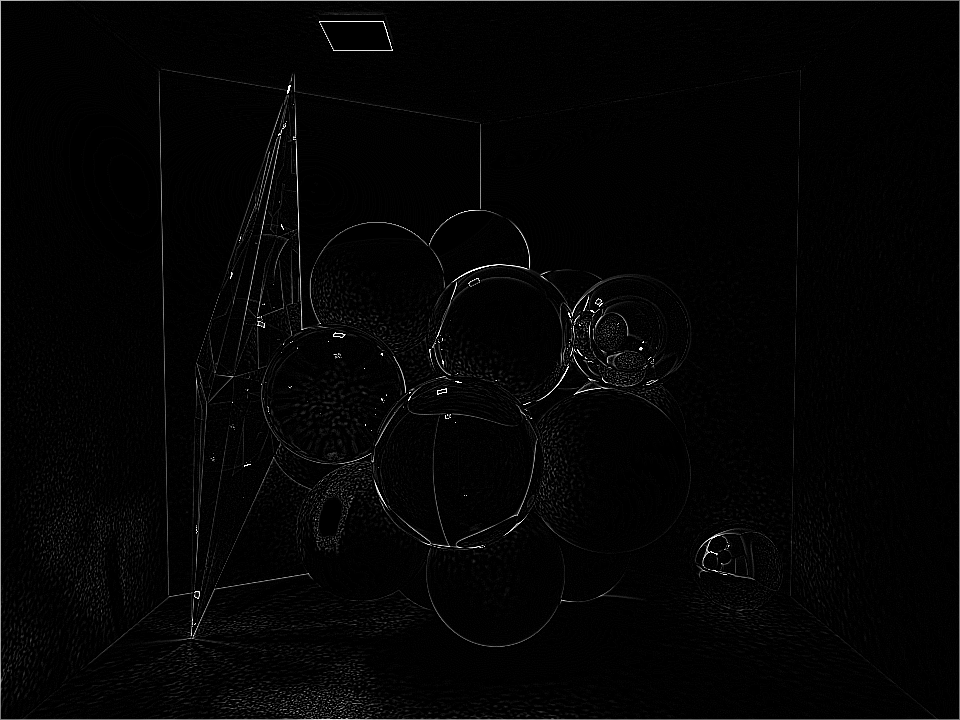

In [9]:
img1_gray.filter(ImageFilter.FIND_EDGES)

In [146]:
ref_edge_list = np.array(img1_gray.filter(ImageFilter.FIND_EDGES)).reshape(-1)

In [155]:
for i in range(1, 11, 2):
    img2_gray_blur = img2_gray.filter(ImageFilter.MedianFilter(size=i))
    img2_gray_blur_edge = img2_gray_blur.filter(ImageFilter.FIND_EDGES)
    edge_list = np.array(img2_gray_blur_edge).reshape(-1)
    print(MSE(ref_edge_list, edge_list))

142.2495876736111
117.46110243055556
136.54475983796297
149.22729021990742
158.1241579861111


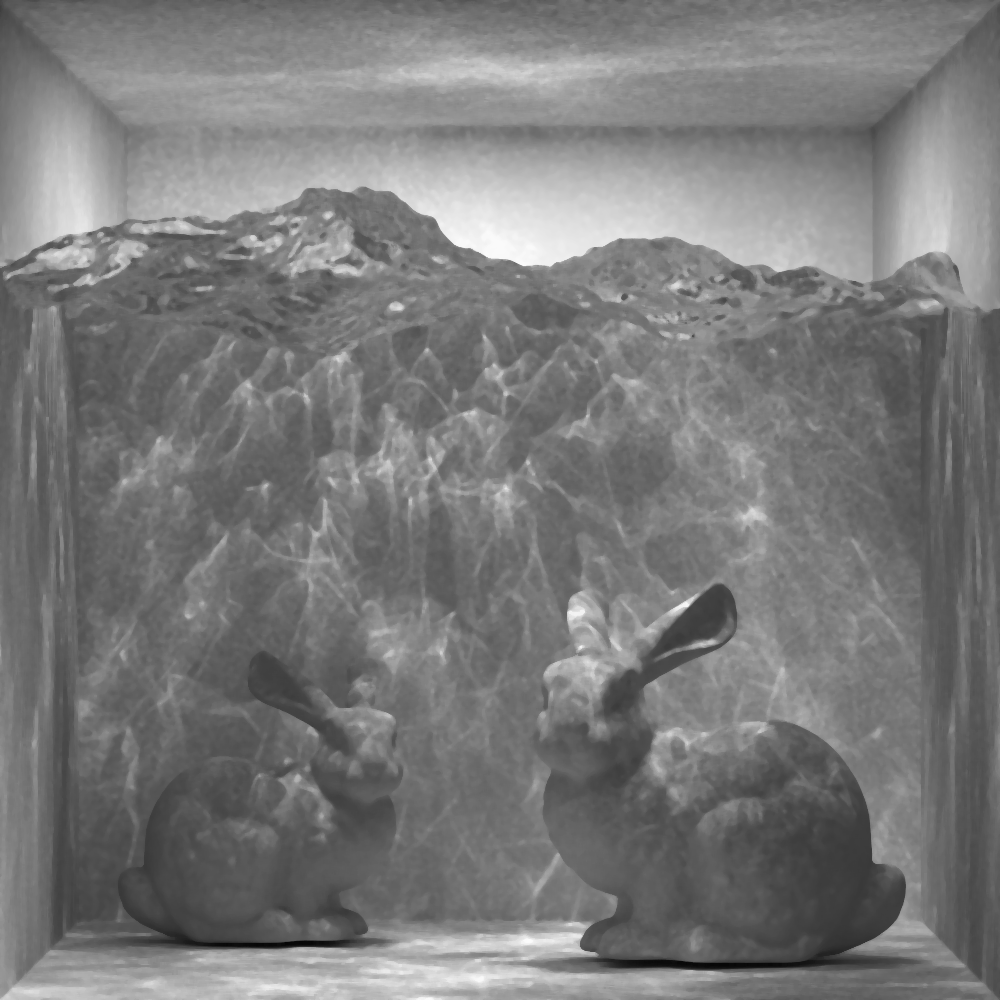

In [189]:
from PIL import ImageFilter
img2_gray.filter(ImageFilter.MedianFilter(size=5))

In [160]:
np.array(img1_gray)[0:5, 0:5]

array([[180, 180, 180, 180, 180],
       [180, 180, 180, 180, 180],
       [181, 181, 181, 181, 181],
       [182, 182, 182, 182, 182],
       [182, 182, 182, 182, 182]], dtype=uint8)

In [180]:
tmp_arr = img1_gray.filter(ImageFilter.FIND_EDGES)

In [181]:
edge_arr = np.array(tmp_arr).reshape(-1)
cnt = [0] * 256
for v in edge_arr:
    cnt[v] += 1
for i in range(256):
    print(cnt[i])

532658
18770
18284
17931
17251
16759
16137
15545
14668
14375
13448
12737
12232
11627
11067
10537
10047
9661
9059
8527
8018
7624
7249
6962
6807
6414
6099
5758
5454
5261
4918
4849
4488
4311
4105
3941
3812
3541
3448
3300
3168
3072
2886
2712
2618
2503
2392
2378
2209
2092
2019
1984
1869
1792
1775
1619
1600
1654
1499
1423
1359
1362
1327
1278
1174
1192
1193
1135
1023
1044
1031
945
958
885
830
884
800
850
781
795
777
711
740
693
724
660
676
651
656
655
635
618
636
658
614
646
563
561
604
567
532
535
488
489
447
422
423
427
419
416
407
409
382
353
362
367
349
315
306
295
289
307
294
298
254
275
260
296
267
267
308
324
259
264
267
243
255
228
224
201
215
203
183
200
188
193
189
189
183
181
185
155
169
158
173
146
153
137
160
112
120
131
137
103
110
123
123
125
127
116
128
106
116
112
110
107
119
107
119
105
111
96
126
107
100
96
87
74
83
89
79
87
73
78
74
75
83
90
61
74
64
71
66
64
58
47
64
55
59
57
54
56
57
56
54
50
54
52
39
44
62
44
53
41
43
46
37
38
46
38
41
54
41
36
35
38
32
39
35
36
34
31
3

In [174]:
edge_arr

array([180, 180, 180, ..., 115, 116, 116], dtype=uint8)

In [165]:
img1_gray_arr.save('tmp.tga')

AttributeError: 'numpy.ndarray' object has no attribute 'save'